# 20191624 신봉균

### 연습문제 4.2

#### 도수분포표(상대도수 포함)

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name= font_manager.FontProperties(fname='C:\Windows\Fonts\H2GTRE.TTF').get_name()
rc('font',family=font_name)


brothers = np.array([1,5,2,1,3,4,2,2,1,1,
                    3,2,3,1,4,1,1,2,5,1,
                    2,2,2,1,2,3,2,2,2,2,
                    2,2,3,3,2,1,2,2,2,1,
                    1,3,1,3,3,2,1,1,2,2])
table= pd.crosstab(index= brothers, colnames=['형제수'], columns='도수')
table.index=['1명','2명','3명','4명','5명']
table['상대도수']=np.round(table.도수/sum(table.도수),2)

print(table)


형제수  도수  상대도수
a명   15  0.30
b명   22  0.44
c명    9  0.18
4명    2  0.04
5명    2  0.04


#### 막대그래프

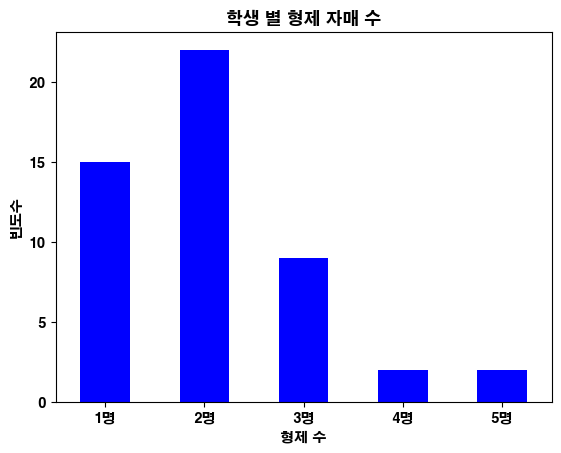

In [63]:
table['도수'].plot(kind='bar', color='blue', legend=False)
plt.xlabel('형제 수')
plt.ylabel('빈도수')
plt.title("학생 별 형제 자매 수")
plt.xticks(rotation=0)
plt.show()

#### 원형 그래프

<function matplotlib.pyplot.show(close=None, block=None)>

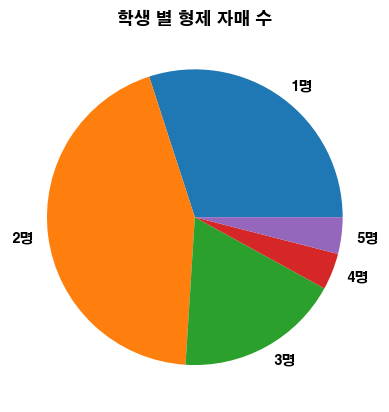

In [64]:
plt.figure()
plt.pie(table['도수'], labels=table.index)
plt.rc('font',size= 10)
plt.title('학생 별 형제 자매 수')
plt.show

### 연습문제 5.8

In [140]:
import numpy as np
import pandas as pd

student_result = np.array([54,80,83,42,86,63,63,57,71,84,77,59,
                          90,73,81,76,56,81,85,51,94,66,73,88,
                          89,87,56,84,61,78,83,91,58,50,82])

width = round((max(student_result)-min(student_result))/7) #최솟값:42, 최댓값:94, 계급의 수:7개  폭= (94-42)/7=7.428571428571429=7.5
gap = pd.crosstab(index=pd.cut(student_result, bins=np.arange(39.5, 92.1, 7.5)),colnames=['경계'], columns='도수')
#pandas의 cut 함수를 사용하여 39.5 시작점에서 7.5간격으로 구간을 나누었다.
gap.index = ['39.5~47.0', '47.0~54.5', '54.5~62', '62~69.5', '69.5~77.0', '77.0~84.5', '84.5~92']# 막대기 7개
gap['상대도수']= gap['도수']/sum(gap['도수'])
print(gap)

print(round(sum(gap[3:]['도수'])/sum(gap['도수']),2)) # 62점이상
print(round(sum(gap[:2]['도수'])/sum(gap['도수']),2))#55점미만

경계         도수      상대도수
39.5~47.0   1  0.029412
47.0~54.5   3  0.088235
54.5~62     6  0.176471
62~69.5     3  0.088235
69.5~77.0   5  0.147059
77.0~84.5   9  0.264706
84.5~92     7  0.205882
0.71
0.12


#### 히스토그램

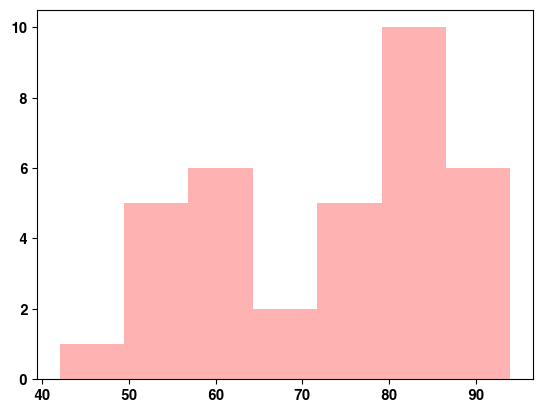

In [149]:
plt.figure()
n, bins, patches = plt.hist(student_result, bins = 7, facecolor='red', alpha = 0.3)
plt.show()

#### 도수다각형

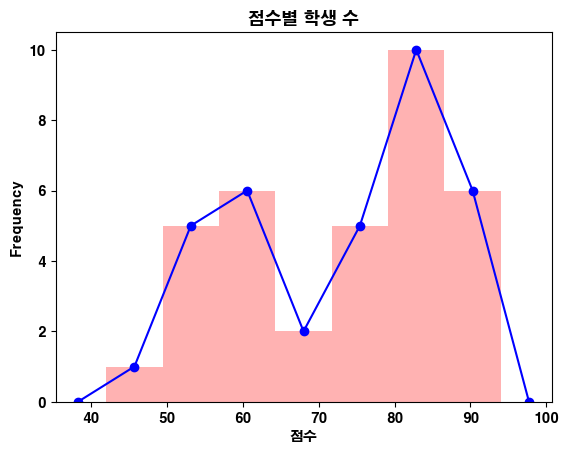

In [155]:
plt.figure()
n, bins, patches = plt.hist(student_result, bins = 7, facecolor='red', alpha = 0.3)
x = [(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]  #x : 계급의 중간값
w_bin = bins[1]-bins[0]  # bins1(평균값) - bins0 평균값 : 계급 경계값
x.insert(0, x[0]-w_bin)  
x.append(x[-1]+w_bin)
n = np.insert(n,0,0.0)
n = np.append(n,0.0)
plt.xlabel('점수')
plt.ylabel('Frequency')
plt.title("점수별 학생 수")
plt.plot(x,n,'blue',marker='o')
plt.show()

### 연습문제 5.9

#### (1)분포의 모양을 보면 이봉형을 띄며 60점대와 80점대 학생이 가장 많은 것을 알 수 있다.

##### (2)성적이 62점 이상인 비율은 round(sum(gap[3:]['도수'])/sum(gap['도수']),2)= 24/34 약 71퍼센트이다.

##### (3)55점 미만의 학생들은  round(sum(gap[:2]['도수'])/sum(gap['도수']),2)= 약 12 퍼센트이다.